In [20]:
# Importing Dependencies
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
# Reading CSV file into pandas.
df_fifa_players_original = pd.read_csv('Resources/fifa_players.csv')

In [22]:
#Creating Copy of original to avoid altering it. 
df_fifa_players = df_fifa_players_original.copy()

#Creating Unique Identifier for each player for join/merge purposes.
df_fifa_players['id'] = range(1, len(df_fifa_players) + 1)

In [23]:
 # Reordering Id coloumn to be the first. 
df_fifa_players = df_fifa_players[['id'] + [col for col in df_fifa_players.columns if col != 'id']]
df_fifa_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [24]:
#Dropping irrelevant columns
df_fifa_players.drop(columns=['release_clause_euro','age','national_team','national_rating',
                              'national_team_position','national_jersey_number',
                              'international_reputation(1-5)', 'weak_foot(1-5)', 
                              'skill_moves(1-5)','body_type'
                              ], inplace=True)

In [25]:
# Dropping rows with missing values
df_fifa_players = df_fifa_players.dropna(subset=['value_euro','wage_euro'])

In [26]:
# Checking for null values
df_fifa_players.isnull().sum()

id                   0
name                 0
full_name            0
birth_date           0
height_cm            0
weight_kgs           0
positions            0
nationality          0
overall_rating       0
potential            0
value_euro           0
wage_euro            0
preferred_foot       0
crossing             0
finishing            0
heading_accuracy     0
short_passing        0
volleys              0
dribbling            0
curve                0
freekick_accuracy    0
long_passing         0
ball_control         0
acceleration         0
sprint_speed         0
agility              0
reactions            0
balance              0
shot_power           0
jumping              0
stamina              0
strength             0
long_shots           0
aggression           0
interceptions        0
positioning          0
vision               0
penalties            0
composure            0
marking              0
standing_tackle      0
sliding_tackle       0
dtype: int64

In [27]:
# Creating Dataframe with player info.
df_player_info = df_fifa_players[['id','name','birth_date','height_cm','weight_kgs',
       'overall_rating','potential','nationality','value_euro','wage_euro']]

# Creating age column as per birthday. 
current_date = pd.Timestamp(datetime.now())
df_player_info['birth_date'] = pd.to_datetime(df_player_info['birth_date'])
df_player_info['age'] = current_date.year - df_player_info['birth_date'].dt.year

# Filtering column to have players most preferred position. 
df_player_info['position'] = df_fifa_players['positions'].str.extract(r'^([^,]+)')
df_player_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              17699 non-null  int64         
 1   name            17699 non-null  object        
 2   birth_date      17699 non-null  datetime64[ns]
 3   height_cm       17699 non-null  float64       
 4   weight_kgs      17699 non-null  float64       
 5   overall_rating  17699 non-null  int64         
 6   potential       17699 non-null  int64         
 7   nationality     17699 non-null  object        
 8   value_euro      17699 non-null  float64       
 9   wage_euro       17699 non-null  float64       
 10  age             17699 non-null  int32         
 11  position        17699 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(3)
memory usage: 1.7+ MB


C:\Users\rdesh\AppData\Local\Temp\ipykernel_49572\3454758395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_info['birth_date'] = pd.to_datetime(df_player_info['birth_date'])
C:\Users\rdesh\AppData\Local\Temp\ipykernel_49572\3454758395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_info['age'] = current_date.year - df_player_info['birth_date'].dt.year
C:\Users\rdesh\AppData\Local\Temp\ipykernel_49572\3454758395.py:11: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [34]:
#Filtering Data to contain information of defensive players
df_defense = df_fifa_players[df_fifa_players['positions'].str.contains('LB|RB|CB|LWB|RWB')]

# Filtering Dataframe to keep columns relevant to defensive players
df_defense = df_defense[['id','aggression', 'interceptions', 
                            'positioning','marking','long_shots',
                            'standing_tackle','short_passing','long_passing',
                            'sliding_tackle']]

df_defense.head()

,id,aggression,interceptions,positioning,marking,long_shots,standing_tackle,short_passing,long_passing,sliding_tackle
4,5,87,88,24,91,15,88,68,60,87
5,6,82,88,41,90,64,89,79,81,84
16,17,86,86,30,92,30,89,73,69,84
20,21,84,89,60,89,66,87,79,74,88
22,23,84,83,85,71,70,82,84,78,83


In [29]:
#Filtering Data to contain information of attacking players
df_attackers = df_fifa_players[df_fifa_players['positions'].str.contains('CM|CAM|RM|LM|ST|CF|\bLW\b|\bRW\b')]

# Filtering Dataframe to keep columns relevant to attacking players
df_attackers = df_attackers[['id','crossing','finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control','shot_power', 'long_shots']]

df_attackers.head()

,id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,shot_power,long_shots
0,1,86,95,70,92,86,97,93,94,89,96,85,94
1,2,88,81,52,91,80,84,86,87,89,91,84,89
2,3,80,75,75,86,85,87,85,82,90,90,90,82
3,4,86,77,56,85,74,90,87,77,78,93,75,84
6,7,77,88,77,82,78,90,77,63,73,91,79,78


In [30]:
#Filtering Data to contain information of physical attributes
df_physical = df_fifa_players[['id','reactions','balance','jumping', 'stamina', 'strength','aggression']]

df_physical.head()

,id,reactions,balance,jumping,stamina,strength,aggression
0,1,95,95,68,72,66,48
1,2,88,81,50,92,58,46
2,3,82,66,83,88,87,78
3,4,83,93,53,75,44,34
4,5,82,40,81,75,94,87


In [31]:
#filtering data to contain information for goalkeepers
df_gk = df_fifa_players[df_fifa_players['positions'].str.contains('GK')]

# Filtering Dataframe to keep columns relevant to Goalkeepers
df_gk = df_gk[['id', 'agility','positioning', 'reactions', 'jumping', 'strength',
       'balance','stamina']]
df_gk.head()

,id,agility,positioning,reactions,jumping,strength,balance,stamina
8,9,51,12,84,77,80,35,43
11,12,61,13,84,68,70,45,38
12,13,37,11,86,79,78,43,35
27,28,60,16,84,74,75,61,39
32,33,41,15,79,71,51,39,37


c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

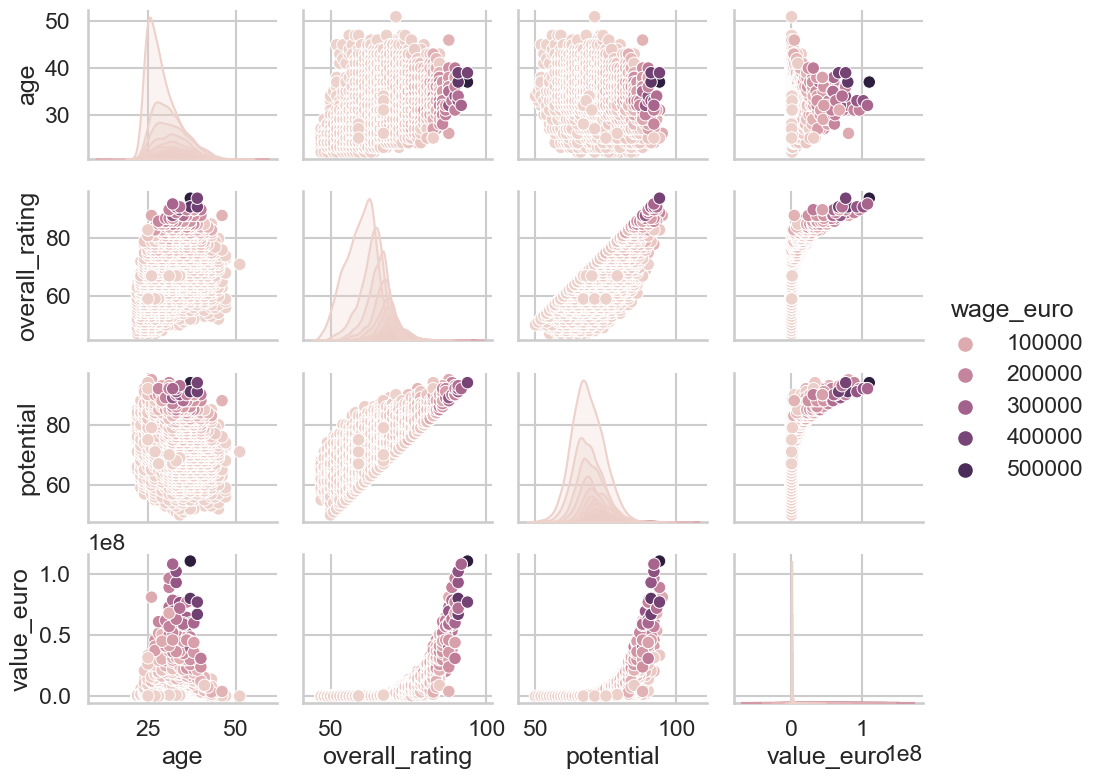

In [32]:
#Filtering Dataframe to have columns needed for pair plot.
column_toplot = df_player_info[['age', 'overall_rating', 'potential','value_euro' ,'wage_euro']]

# Pair plot style
sns.set_style("whitegrid")
sns.set_context("talk")

# plotting pair plot and setting parameters. 
sns.pairplot(data=column_toplot, 
             hue="wage_euro",
             kind='scatter',  
             diag_kind='auto',  
             height=2, 
             aspect=1.2,
            )
plt.show()

In [33]:
# Exporting dataframe as CSV files
df_fifa_players.to_csv('Resources/all_player_data.csv', index=False)
df_player_info.to_csv('Resources/player_info.csv', index=False)
df_gk.to_csv('Resources/goalkeeper_data.csv', index=False)
df_attackers.to_csv('Resources/attackers_data.csv', index=False)
df_defense.to_csv('Resources/defensive_data.csv', index=False)
df_physical.to_csv('Resources/physical_data.csv', index=False)